In [ ]:
pip install selenium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install urllib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement urllib (from versions: none)
ERROR: No matching distribution found for urllib


In [ ]:
# 필요한 라이브러리 불러오기
from selenium import webdriver
from urllib.request import urlopen
from selenium.webdriver.common.keys import Keys
import time
import urllib.request
import os
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import ElementNotVisibleException
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!apt install chromium-chromedriver

Reading package lists... Done
Building dependency tree       
Reading state information... Done
chromium-chromedriver is already the newest version (107.0.5304.87-0ubuntu11.18.04.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.


In [ ]:
# 2. 크롬 웹드라이버 연결
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome("chromedriver", chrome_options=chrome_options)
driver.get("https://www.google.co.kr/imghp?hl=ko&ogbl")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: use options instead of chrome_options
  


In [ ]:
# 3. 검색어 입력하기
search = "바다"
elem = driver.find_element(By.CSS_SELECTOR, '[name="q"]')
elem.send_keys(search)
elem.send_keys(Keys.RETURN)

In [ ]:
# 4. 스크롤 끝까지 내리기
SCROLL_PAUSE_TIME = 1

last_height = driver.execute_script("return document.body.scrollHeight")

while True:
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(SCROLL_PAUSE_TIME)
    new_height = driver.execute_script("return document.body.scrollHeight")

    if new_height == last_height:
        try:
            driver.find_element_by_css_selector(".mye4qd").click()
        except:
            break
    last_height = new_height

https://post-phinf.pstatic.net/MjAxOTA4MjNfMTQy/MDAxNTY2NTM5Njk3MDc1.d-pxKdg0Ni8cppT3_g-TfaoL7eBjWdaQD7YsocRRpzIg.ftK-ZuCMq8X1Q-oeENQa5v1QdXPiSdNm7Gr8UuWdOJAg.JPEG/1%ED%99%94_%EB%B0%94%EB%8B%A4.jpg?type=w1200
https://t1.daumcdn.net/thumb/R720x0/?fname=http://t1.daumcdn.net/brunch/service/user/5xq2/image/0lp8RLaJ2IgctTWVl2nEa-JRCSc.jpg
https://cdn.newspenguin.com/news/photo/202206/11679_35032_2840.jpg
https://img.freepik.com/free-photo/beautiful-tropical-empty-beach-sea-ocean-with-white-cloud-on-blue-sky-background_74190-13665.jpg?auto=format&h=200
https://news.samsungdisplay.com/wp-content/uploads/2022/05/IT_twi001t1345955-1-1024x639.jpg
https://src.hidoc.co.kr/image/lib/2022/7/20/1658306424525_0.jpg
https://www.meteorologiaenred.com/wp-content/uploads/2020/09/caracteristicas-de-los-oceanos.jpg

https://post-phinf.pstatic.net/MjAyMDAzMTFfMTMg/MDAxNTgzOTEzOTM0NDUz.reBiU6WBmcDPTvDI-mS3_lDXK7PLos6N8GatUZV9H4wg.MQfywS5UmpCZ6Oi3QJIY0SZvTQo7YT9jRKHvUy0tQDAg.JPEG/00.jpg?type=w1200
https://new
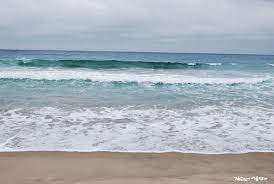
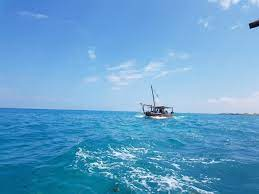
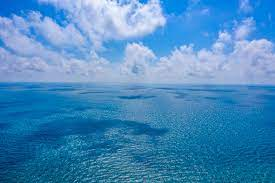

In [ ]:
# 5. 이미지 찾아서 원본 파일로 저장하기
images = driver.find_elements(By.CSS_SELECTOR,".rg_i.Q4LuWd")
count = 1

for image in images:
    if count>200:
      break
    try:
      image.click()
      time.sleep(2)
      #imgurl = driver.find_element(By.XPATH,'/html/body/div[2]/c-wiz/div[3]/div[2]/div[3]/div/div/div[3]/div[2]/c-wiz/div/div[1]/div[1]/div[2]/div[1]/a/img').get_attribute("src")
      imgurl = driver.find_element(By.CSS_SELECTOR,'#Sva75c > div > div > div.dFMRD > div.pxAole > div.tvh9oe.BIB1wf > c-wiz > div.nIWXKc.JgfpDb.cZEg1e > div.OUZ5W > div.zjoqD > div.qdnLaf.isv-id.b0vFpe > div > a > img').get_attribute("src")
      print(imgurl)
      # goodde_image 라는 폴더 구글 드라이브 제일 루트 위치에 만들어야 해요!!
      urllib.request.urlretrieve(imgurl, "/content/drive/MyDrive/water/" + "바다다" + "_" + str(count) + ".jpg") 
      count+=1
    except:
      print("error")
      pass
    

driver.close()